### 자료(1)

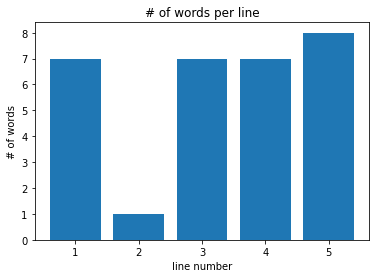

In [3]:
import numpy as np
import matplotlib.pyplot as plt

with open('file.txt', 'r', encoding='utf-8') as f:
    a = f.readlines()

t = []
for i in a:
    i.replace("\n", "")
    t.append(len(i.split()))

plt.bar(np.arange(1, len(t) + 1), t)
plt.xlabel("line number")
plt.ylabel("# of words")
plt.title("# of words per line")

plt.show()

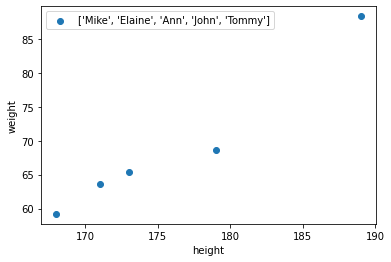

In [22]:
name = ['Mike', 'Elaine', 'Ann', 'John', 'Tommy']
height = [173, 168, 171, 189, 179]
weight = [65.4, 59.2, 63.6, 88.4, 68.7]
gender = ['M', 'F', 'F', 'M','M']

plt.scatter(height, weight, label=name)
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()

In [28]:
import pandas as pd

x = pd.DataFrame({"height":height, "weight":weight, "gender":gender}, index=name)
x

,height,weight,gender
Mike,173,65.4,M
Elaine,168,59.2,F
Ann,171,63.6,F
John,189,88.4,M
Tommy,179,68.7,M


In [30]:
x['bmi'] = ((x['weight'] / x['height'])**2) * 100
x

,height,weight,gender,bmi
Mike,173,65.4,M,14.291022
Elaine,168,59.2,F,12.417234
Ann,171,63.6,F,13.833179
John,189,88.4,M,21.876655
Tommy,179,68.7,M,14.730158


In [37]:
print(x[x.gender == 'M']['bmi'].mean())
print(x[x.gender == 'F']['bmi'].mean())

16.965945169729604
13.125206499959171


### 자료(2)

In [41]:
a = np.arange(9).reshape(3, 3)
print(a[[1, 2]])
print(a.transpose()[1][2])

[[3 4 5]
 [6 7 8]]
7


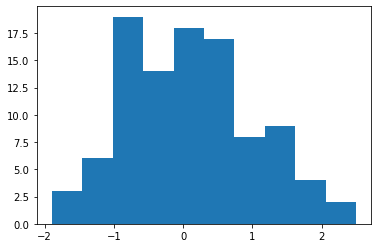

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(100)
plt.hist(x)

plt.show()

In [2]:
from pandas import Series, DataFrame
import pandas as pd

obj1 = Series(['sonata', 'grandure', 'genesis'], index=[0, 3, 4])
obj2 = obj1.reindex(range(5), method='ffill')
print(obj2)
obj3 = obj2.drop([1, 3])
print(obj3)


0      sonata
1      sonata
2      sonata
3    grandure
4     genesis
dtype: object
0     sonata
2     sonata
4    genesis
dtype: object


In [ ]:

frame = pd.DataFrame(np.arange(12).reshape(3 ,4), columns=['Spring', 'Summer', 'Fall', 'Winter'], index=['Korea', 'China', 'Japan'])
print(frame)
print(frame.max(axis=0))

frame.mean(1).rank()

In [18]:
ages = [2, 18, 30, 3, 51, 62, 44, 9, 22, 12, 26, 38, 55, 68, 88, 28, 14]
groupnames = ['Young', 'Adult', 'Old']
t = pd.cut(ages, [0, 20, 50, 100], right=False, labels=groupnames)
# 대상, 구간(0~19(오른쪽 값 포함 x - right 옵션), 20~49, 50~99), 오른쪽 값 포함 여부, 레이블명
print(pd.value_counts(t))   # 구간별 개수 확인

Young    6
Adult    6
Old      5
dtype: int64


In [21]:
ages = [2, 18, 30, 3, 51, 62]
s = Series(ages)
s[s < 5] = 'child'
print(list(s))

['child', 18, 30, 'child', 51, 62]


In [51]:
import re
# 참고
print(re.search(r"\.", "aa..").group())
print(re.search("\.", "aa..").group())
print(re.search("[.]", "aa..").group())
print(re.search(".", "aa..").group())

.
.
.
a


In [37]:
import re
text = """Dave dave@google3.com
Rob rob@gmail.co
Ryan ryan+kim@cs-kpu.org
Conor conor@kpu.ac.3kr
"""

pattern = r'[A-Z0-9._+]+@[A-Z0-9.-]+\.[A-Z]{3}'
regex = re.compile(pattern, flags=re.IGNORECASE)
print(regex.findall(text))

['dave@google3.com', 'ryan+kim@cs-kpu.org']


In [49]:
s = Series(['e', 'b', 'a', 'b'], index = ['Tom', 'Elaine', 'John', 'Jeff'])
df = pd.get_dummies(list(s))    # 값이 컬럼이 된 데이터프레임 반환 - 사전 순 적용
df.set_index(s.index)

,a,b,e
Tom,0,0,1
Elaine,0,1,0
John,1,0,0
Jeff,0,1,0
